In [43]:
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import string

import matplotlib.pyplot as plt
import plotly.express as px



[nltk_data] Downloading package punkt to /home/ayush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ayush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
df = pd.read_csv('./IMDB Dataset.csv')

In [45]:
df = df[:2000]

In [46]:
print(df['sentiment'].value_counts())
stop_words = stopwords.words()

positive    1005
negative     995
Name: sentiment, dtype: int64


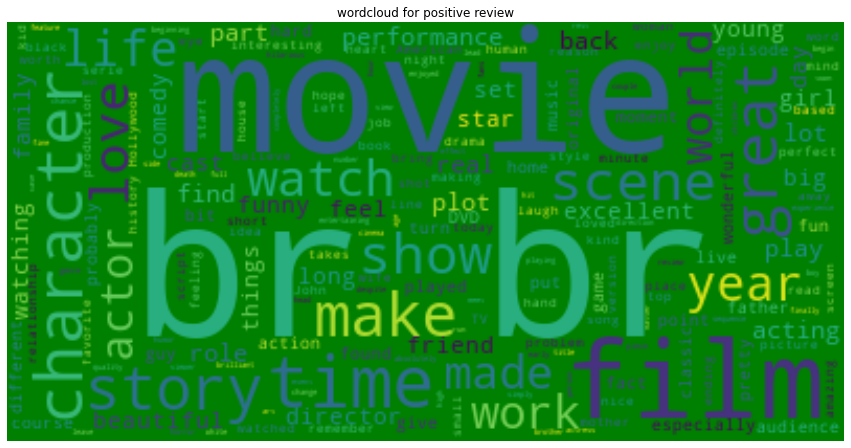

In [47]:
text = " ".join(i for i in df[df['sentiment']=='positive']['review'])
wordcloud = WordCloud(stopwords=stop_words, background_color="green").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

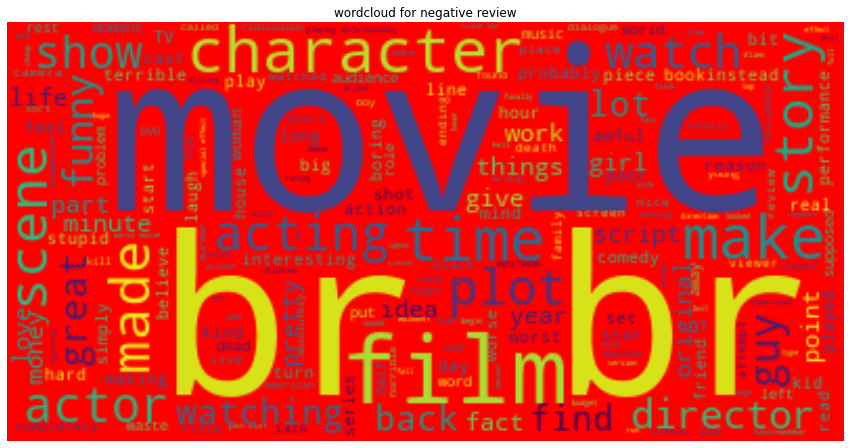

In [48]:
text = " ".join(i for i in df[df['sentiment']=='negative']['review'])
#stopwords = set(STOPWORDS)
#wordcloud = WordCloud( background_color="white").generate(text)
wordcloud = WordCloud(stopwords=stop_words, background_color="red").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

In [49]:
df.rename(columns={'review':'text'}, inplace = True)
#Removing all the stop words
df['text'] = df['text'].apply(lambda idx: ' '.join([ch for ch in idx.split(' ') if ch not in (stop_words)]) )

In [50]:
df['sentiment'] = [0 if val == 'negative' else 1 for val in df['sentiment']]

In [51]:
tokens = df['text'].apply(lambda idx: idx.split())

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
en_token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = en_token.tokenize)
text_data = cv.fit_transform(df['text'])

In [53]:

X=text_data
y=df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions = MNB.predict(X_test)
score = metrics.accuracy_score(predictions, y_test)

print("Multinomial Bayes Model has an accuracy of: {}".format(score * 100))
print("==================================================================")
print(" All Metrics: ")
print(classification_report(y_test, predictions))

Multinomial Bayes Model has an accuracy of: 78.0
 All Metrics: 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       198
           1       0.81      0.74      0.77       202

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



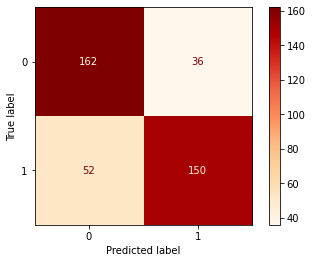

In [66]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
plot_confusion_matrix(MNB, X_test, y_test, cmap='OrRd')  

In [67]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictions = BNB.predict(X_test)
score = metrics.accuracy_score(predictions, y_test)

print("Bernoulli Bayes Model has an accuracy of: {}".format(score * 100))
print("==================================================================")
print(" All Metrics: ")
print(classification_report(y_test, predictions))

Bernoulli Bayes Model has an accuracy of: 80.0
 All Metrics: 
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       198
           1       0.86      0.72      0.78       202

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



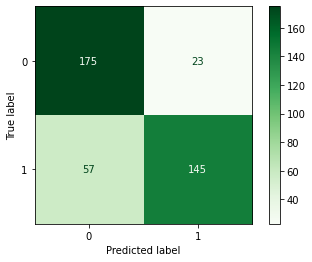

In [68]:
plot_confusion_matrix(BNB, X_test, y_test, cmap='Greens')

0.8731123112311231 0.8907765776577657


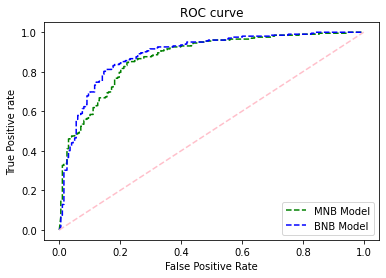

In [71]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models:
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
#fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
#auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_MNB,auc_BNB)

# plot roc curves
#plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();